<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marco-canas/investigacion_dengue/blob/main/machine_learning/1_time_series/6_seminario%206%3A%20time_series_basics/6_seminario_time_series_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

### [Video de apoyo](https://www.youtube.com/watch?v=YFBWknWaX6s)

# Vocabulary  

* Indexing: Indexación. 
* Selection:
* Subsetting: 
* time series basics: Conceptos básicos de series de tiempo. 

# Seminario 6: Septiembre 13. Indexing, Selection, Subsetting  



Las series de tiempo se comportan como cualquier otro pandas.Series cuando indexa y selecciona datos según la etiqueta:

In [1]:
from datetime import datetime # 

In [3]:
lista_fechas = [datetime(2023, 9, 13), datetime(2023, 9, 14), datetime(2023, 9, 15),\
                 datetime(2023, 9, 16), datetime(2023, 9, 17), datetime(2023, 9, 18)]

In [4]:
lista_fechas


[datetime.datetime(2023, 9, 13, 0, 0),
 datetime.datetime(2023, 9, 14, 0, 0),
 datetime.datetime(2023, 9, 15, 0, 0),
 datetime.datetime(2023, 9, 16, 0, 0),
 datetime.datetime(2023, 9, 17, 0, 0),
 datetime.datetime(2023, 9, 18, 0, 0)]

In [10]:
distancia_caminada = [12, 11, 13, 14, 16, 17]

In [7]:
import pandas as pd 

In [11]:
serie_tiempo = pd.Series(distancia_caminada, index = lista_fechas)

In [13]:
serie_tiempo

2023-09-13    12
2023-09-14    11
2023-09-15    13
2023-09-16    14
2023-09-17    16
2023-09-18    17
dtype: int64

In [15]:
import matplotlib.pyplot as plt 

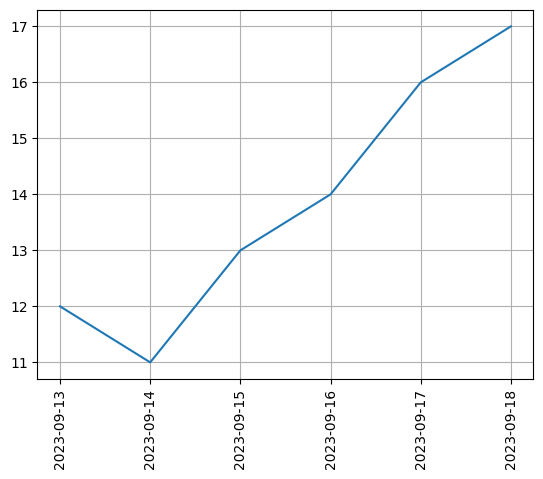

In [27]:
plt.plot(serie_tiempo)

plt.xticks(rotation = 90)

plt.grid()

plt.savefig('/home/marco/Documentos/investigacion/investigacion_dengue/machine_learning/images/serie_tiempo_sencilla.jpg')


plt.show()

# Objetivo

* Crear series de tiempo como series de pandas y visualizarlas. 

# Mapa conceptual

In [29]:
import networkx as nx 



# Continuamos con la lectura a Wes en la página 322

# 11.2 Time Series Basics


A basic kind of time series object in pandas is a Series indexed by timestamps, which is often represented external to pandas as Python strings or datetime objects:


In [24]:
import numpy as np 
from datetime import datetime


In [25]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),datetime(2011, 1, 7), datetime(2011, 1, 8),
datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = pd.Series(np.random.randn(6), index=dates)
ts


2011-01-02   -0.654534
2011-01-05   -0.002561
2011-01-07    0.930571
2011-01-08   -1.062357
2011-01-10    0.304413
2011-01-12    2.643905
dtype: float64

Under the hood, these datetime objects have been put in a DatetimeIndex:


In [26]:
ts.index


DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)


Like other Series, arithmetic operations between differently indexed time series automatically align on the dates:


In [30]:
ts + ts[::2]


2011-01-02   -1.309067
2011-01-05         NaN
2011-01-07    1.861142
2011-01-08         NaN
2011-01-10    0.608827
2011-01-12         NaN
dtype: float64

Recall that ts[::2] selects every second element in ts.  

pandas stores timestamps using NumPy’s datetime64 data type at the nanosecond resolution:


In [31]:
ts.index.dtype



dtype('<M8[ns]')

Scalar values from a DatetimeIndex are pandas Timestamp objects:

In [33]:
stamp = ts.index[0]
stamp


Timestamp('2011-01-02 00:00:00')


A Timestamp can be substituted anywhere you would use a datetime object. Additionally, it can store frequency information (if any) and understands how to do time
zone conversions and other kinds of manipulations. More on both of these things later.


# Indexing, Selection, Subsetting
Time series behaves like any other pandas.Series when you are indexing and select‐
ing data based on label:


In [34]:
stamp = ts.index[2]
ts[stamp]


0.9305712325983034


As a convenience, you can also pass a string that is interpretable as a date:


In [36]:
ts['1/10/2011']


0.30441334172457746

In [37]:
ts['20110110']


0.30441334172457746


For longer time series, a year or only a year and month can be passed to easily select slices of data:


In [38]:
longer_ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
longer_ts


2000-01-01   -0.572251
2000-01-02    0.181127
2000-01-03    0.623901
2000-01-04   -0.608279
2000-01-05    0.719119
                ...   
2002-09-22   -0.880593
2002-09-23   -0.159132
2002-09-24    0.508667
2002-09-25   -1.147251
2002-09-26    0.018198
Freq: D, Length: 1000, dtype: float64

In [39]:
longer_ts['2001']


2001-01-01    1.144233
2001-01-02   -1.594909
2001-01-03   -0.220690
2001-01-04   -0.484928
2001-01-05    0.529552
                ...   
2001-12-27   -0.902289
2001-12-28   -0.563731
2001-12-29   -0.957867
2001-12-30    0.302567
2001-12-31   -1.369982
Freq: D, Length: 365, dtype: float64

In [ ]:
Here, the string '2001' is interpreted as a year and selects that time period. This also works if you specify the month:


In [40]:
longer_ts['2001-05']


2001-05-01   -0.225754
2001-05-02    0.821742
2001-05-03    0.161792
2001-05-04    0.139685
2001-05-05   -0.052132
2001-05-06   -0.100256
2001-05-07    0.507323
2001-05-08    0.414166
2001-05-09    1.810118
2001-05-10    0.468054
2001-05-11    0.004768
2001-05-12   -0.110624
2001-05-13   -1.193084
2001-05-14    0.896715
2001-05-15   -0.494504
2001-05-16    0.427113
2001-05-17    0.053587
2001-05-18    0.206327
2001-05-19    1.066532
2001-05-20   -1.126715
2001-05-21   -0.237895
2001-05-22   -0.206244
2001-05-23    0.554961
2001-05-24   -0.603824
2001-05-25    0.438932
2001-05-26   -0.527815
2001-05-27   -0.134037
2001-05-28   -1.377485
2001-05-29    0.044941
2001-05-30    0.168600
2001-05-31   -1.438686
Freq: D, dtype: float64

Slicing with datetime objects works as well:


In [ ]:
In [56]: ts[datetime(2011, 1, 7):]
Out[56]:
2011-01-07 -0.519439
2011-01-08 -0.555730
2011-01-10
1.965781
2011-01-12
1.393406
dtype: float64


Because most time series data is ordered chronologically, you can slice with timestamps not contained in a time series to perform a range query:


In [41]:
ts



2011-01-02   -0.654534
2011-01-05   -0.002561
2011-01-07    0.930571
2011-01-08   -1.062357
2011-01-10    0.304413
2011-01-12    2.643905
dtype: float64

In [42]:
In [58]: ts['1/6/2011':'1/11/2011']


2011-01-07    0.930571
2011-01-08   -1.062357
2011-01-10    0.304413
dtype: float64


As before, you can pass either a string date, datetime, or timestamp. Remember that slicing in this manner produces views on the source time series like slicing NumPy
arrays. This means that no data is copied and modifications on the slice will be reflected in the original data.
There is an equivalent instance method, truncate, that slices a Series between two dates:


In [43]:
ts.truncate(after='1/9/2011')


2011-01-02   -0.654534
2011-01-05   -0.002561
2011-01-07    0.930571
2011-01-08   -1.062357
dtype: float64

All of this holds true for DataFrame as well, indexing on its rows:
In [60]: dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')
In [61]: long_df = pd.DataFrame(np.random.randn(100, 4),
....:
index=dates,
....:
columns=['Colorado', 'Texas',
....:
'New York', 'Ohio'])
In [62]: long_df.loc['5-2001']
Out[62]:
Colorado
Texas New York
Ohio
2001-05-02 -0.006045 0.490094 -0.277186 -0.707213
2001-05-09 -0.560107 2.735527 0.927335 1.513906
2001-05-16 0.538600 1.273768 0.667876 -0.969206
2001-05-23 1.676091 -0.817649 0.050188 1.951312
2001-05-30 3.260383 0.963301 1.201206 -1.852001

# Time Series with Duplicate Indices

Esto para el seminario 7 del 20 de septiembre.. 

# Referencias

* [McKinney, W. (2022). Python for data analysis. " O'Reilly Media, Inc.".](https://d1wqtxts1xzle7.cloudfront.net/62139307/Python-for-Data-Analysis-2nd-Edition20200219-40214-1of6b7q-libre.pdf?1582110463=&response-content-disposition=inline%3B+filename%3DPython_for_Data_Analysis.pdf&Expires=1694149999&Signature=MH1uVxkUnFgwepQUeb-3OdFgQWj0vmtzC4ra~TZ-xyCstLSCg7uaNeDi4yrXghoJ6UEMCGOJkx2s13vayVVP-IzF8I91v6TeW0ZUeIejbWlrkHxtT01V-fJ6q7C~9buozUwVr~o2BY3llLH5rZVlZF31pPefEm3ejjlW8pO~prbQ8VVfyfXs4HzSIQJ~nbTCZU8LfqYwU3yMLV7IH4TQN9eGd8GZuqHjznUJZU995AwYqQqzl5-Xtoz93-S1Pn2UWuS8SsXmFt1ysr~-M7-6lVQw~E9~MFbdCIQRfp~fRtVtHDfB-mEXNEQ1CX518xUB0xT3JtfZdsGArib9UMwOqg__&Key-Pair-Id=APKAJLOHF5GGSLRBV4ZA)

<img src = 'https://wesmckinney.com/images/wes-2017-01-12-small.png'>